# Caso

Estamos buscando maneiras de identificar nossos clientes-chave e fatores de sucesso na
plataforma para identificar padrões e replicar ações para toda a base. Para isso gostaríamos
de analisar a base de pedidos dos nossos lojistas, ou seja, compras efetuadas em sites que
utilizam a nossa plataforma de e-commerce internacionalmente.

Com esses dados em mãos, poderemos propor ações que ajudem nossos lojistas a venderem
mais e por consequência ficarem mais satisfeitos com a nossa plataforma. Para isso os
seguintes dados estão sendo disponibilizados:

# Setup

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mpltick
import numpy as np
import seaborn as sns
from IPython.display import display

%matplotlib inline

rc = {"font.family": "Ubuntu",  # fonte charmosa :P
      "mathtext.fontset": "cm",  # texto matemático em LaTeX
      "font.size": 14,  # Usar tamanho 12 ou 14 pra colocar em documentos
      "axes.axisbelow": True,  # grid abaixo dos dados
      'image.cmap': 'PiYG'}  # Cmap com as cores parecidas com da Bagy :)

plt.rcParams.update(rc)

df = pd.read_csv('./data/clean_teste_dados_ecommerce.csv', sep=';')
# Por algum motivo o dataset original dava erro de encoding. Pra limpar ele subi no Gsheets e baixei como .csv e renomeei pra 'clean_*.csv'


# Limpeza dos dados

In [94]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StoreId      540670 non-null  float64
 2   StockCode    540670 non-null  object 
 3   Description  539216 non-null  object 
 4   Quantity     540670 non-null  float64
 5   InvoiceDate  540670 non-null  object 
 6   UnitPrice    540670 non-null  float64
 7   CustomerID   406289 non-null  float64
 8   Country,,    540670 non-null  object 
dtypes: float64(4), object(5)
memory usage: 37.2+ MB


In [95]:
df.describe()


,StoreId,Quantity,UnitPrice,CustomerID
count,540670.000000,540670.000000,540670.000000,406289.000000
mean,10.489578,9.543128,4.616905,15287.609957
std,5.766419,218.307139,96.870533,1713.619599
min,1.000000,-80995.000000,-11062.060000,12346.000000
25%,5.000000,1.000000,1.250000,13954.000000
50%,10.000000,3.000000,2.080000,15152.000000
75%,15.000000,10.000000,4.130000,16791.000000
max,20.000000,80995.000000,38970.000000,18287.000000


Lendo o arquivo de dados é possível perceber que uma das colunas está formatada com duas vírgulas extras. Assim, vamos renomear e verificar na próxima célula a quantidade de informações nulas:

In [96]:
df.rename(columns={'Country,,': 'Country'}, inplace=True)
df.isna().sum()


InvoiceNo           0
StoreId          1239
StockCode        1239
Description      2693
Quantity         1239
InvoiceDate      1239
UnitPrice        1239
CustomerID     135620
Country          1239
dtype: int64

Acima é possível verificar que há alguns valores nulos no conjunto de dados, com uma quantidade maior na identificação do cliente, o que para este estudo não é grande problema.

Verificando agora a percentagem de dados nulos relativos ao tamanho do conjunto de dados:

In [97]:
old_len = len(df)  # para comparar o tamanho do dataset após a limpeza

df.isna().sum() / len(df) * 100


InvoiceNo       0.000000
StoreId         0.228636
StockCode       0.228636
Description     0.496947
Quantity        0.228636
InvoiceDate     0.228636
UnitPrice       0.228636
CustomerID     25.026342
Country         0.228636
dtype: float64

Como os campos não representam nem 1% do tamanho total (exceto o `CustomerId`) vamos eliminar as linhas com dados nulos

Para o `CustomerId` e `Description` vamos imputar dados como sendo 'n/a' para valores nulos

In [98]:
df.loc[:, ['CustomerID', 'Description']] = df.loc[:,
                                                  ['CustomerID', 'Description']].fillna('N/A')

df.dropna(inplace=True)

df.isna().sum()


InvoiceNo      0
StoreId        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Após o tratamento de dados, verificamos então o tamanho do DataFrame resultante:

In [99]:
print(
    f' O conjunto de dados limpo representa {(len(df) / old_len)*100:.2f}% do conjunto original')


 O conjunto de dados limpo representa 99.77% do conjunto original


Para este caso, uma perda de 0,33% dos dados parece razoável.

In [100]:
df.head()


,InvoiceNo,StoreId,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,11.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/01/10 08:26,2.55,17850.0,"United Kingdom,,"
1,536365,9.0,71053,WHITE METAL LANTERN,6.0,12/01/10 08:26,3.39,17850.0,"United Kingdom,,"
2,536365,17.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/01/10 08:26,2.75,17850.0,"United Kingdom,,"
3,536365,15.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/01/10 08:26,3.39,17850.0,"United Kingdom,,"
4,536365,17.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/01/10 08:26,3.39,17850.0,"United Kingdom,,"


O campo de "País" ainda consta com *trailing commas*, i.e vírgulas sobrando, então: 

In [101]:
df['Country'] = df['Country'].str.replace(',', '', regex=True)

df.head()


,InvoiceNo,StoreId,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,11.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/01/10 08:26,2.55,17850.0,United Kingdom
1,536365,9.0,71053,WHITE METAL LANTERN,6.0,12/01/10 08:26,3.39,17850.0,United Kingdom
2,536365,17.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/01/10 08:26,2.75,17850.0,United Kingdom
3,536365,15.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/01/10 08:26,3.39,17850.0,United Kingdom
4,536365,17.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/01/10 08:26,3.39,17850.0,United Kingdom


In [102]:
df['InvoiceYear'] = pd.to_datetime(df['InvoiceDate']).dt.year
df['InvoiceMonth'] = pd.to_datetime(df['InvoiceDate']).dt.month

df.head()


,InvoiceNo,StoreId,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceMonth
0,536365,11.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/01/10 08:26,2.55,17850.0,United Kingdom,2010,12
1,536365,9.0,71053,WHITE METAL LANTERN,6.0,12/01/10 08:26,3.39,17850.0,United Kingdom,2010,12
2,536365,17.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/01/10 08:26,2.75,17850.0,United Kingdom,2010,12
3,536365,15.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/01/10 08:26,3.39,17850.0,United Kingdom,2010,12
4,536365,17.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/01/10 08:26,3.39,17850.0,United Kingdom,2010,12


Agora parece tudo limpo :)

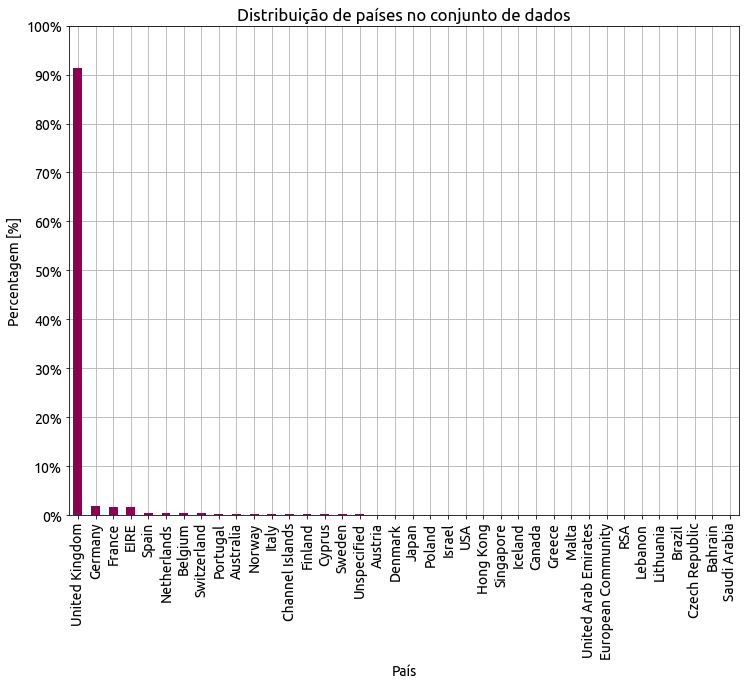

In [103]:
f, ax = plt.subplots(figsize=(12, 9))
df['Country'].value_counts(normalize=True).plot.bar(cmap='PiYG', ax=ax)

ax.yaxis.set_major_formatter(mpltick.PercentFormatter(1))
ax.grid()
ax.set(
    title='Distribuição de países no conjunto de dados',
    xlabel='País',
    ylabel='Percentagem [%]',
    yticks=np.arange(0, 1.1, 0.1))

# f.savefig('./doc/teste_bagy/fig/paises.pdf')
plt.show()


# Quais as 10 lojas com maior faturamento em pedidos?

In [104]:
df['Income'] = df['Quantity'] * df['UnitPrice']

sorted_income = df.sort_values(by=['Income'], ascending=False)
stores_group = sorted_income.groupby('StoreId', sort=False).sum()


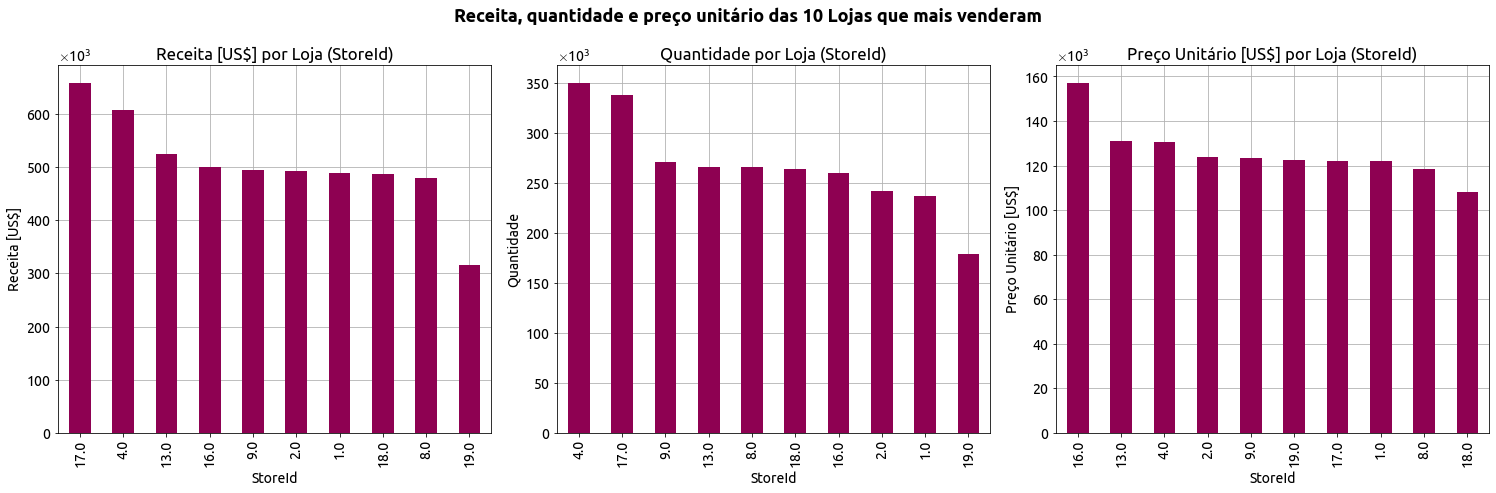

In [105]:
f, ax = plt.subplots(ncols=3, figsize=(21, 7))

f.suptitle('Receita, quantidade e preço unitário das 10 Lojas que mais venderam',
           fontsize=18,
           fontweight='bold')

cols = ['Income', 'Quantity', 'UnitPrice']
labels = [r'Receita [US$]', 'Quantidade', r'Preço Unitário [US$]']

for i in range(len(cols)):

    stores_group[cols[i]].iloc[:10].sort_values(
        ascending=False).plot.bar(ax=ax[i], cmap='PiYG')

    ax[i].ticklabel_format(
        axis='y',
        style='sci',
        useMathText=True,
        scilimits=(3, 3))

    ax[i].set(
        ylabel=labels[i],
        title=f'{labels[i]} por Loja (StoreId)'
    )

    ax[i].grid()

f.tight_layout()
f.savefig('./doc/fig/receita_qtd_preco_10maiores.pdf')

plt.show()


# Qual ticket médio mensal dos pedidos apresentados? Qual o volume médio mensal de vendas (todas as lojas)?

In [106]:
df['InvoiceYear'].value_counts()


2011    498329
2010     42341
Name: InvoiceYear, dtype: int64

In [107]:
year1, year2 = df['InvoiceYear'].value_counts().keys()

group_y1 = df[df['InvoiceYear'] == year1].groupby('InvoiceMonth')
group_y2 = df[df['InvoiceYear'] == year2].groupby('InvoiceMonth')


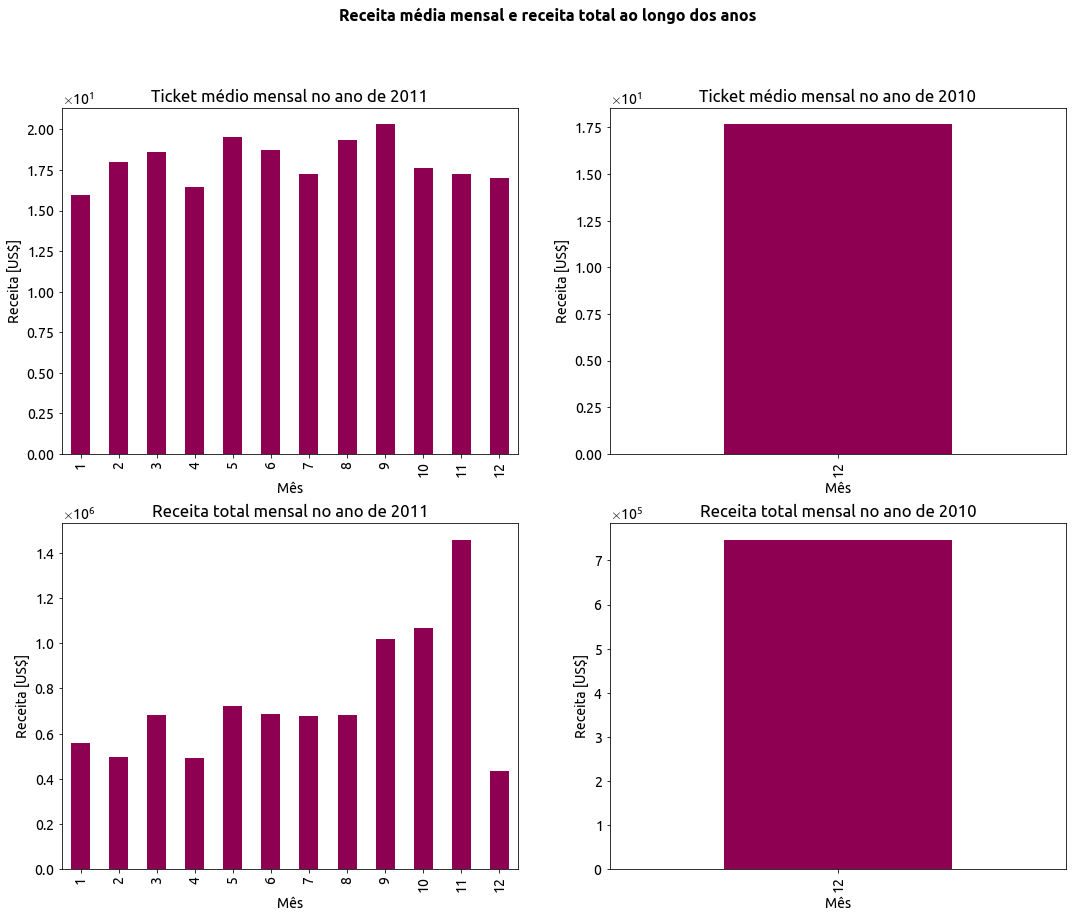

In [165]:

f, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 14))

f.suptitle('Receita média mensal e receita total ao longo dos anos',
           fontweight='bold', fontsize=16)

group_y1.mean()['Income'].plot.bar(ax=axs[0, 0], cmap='PiYG')
group_y2.mean()['Income'].plot.bar(ax=axs[0, 1], cmap='PiYG')

group_y1.sum()['Income'].plot.bar(ax=axs[1, 0], cmap='PiYG')
group_y2.sum()['Income'].plot.bar(ax=axs[1, 1], cmap='PiYG')

for ax in axs.flat:
    ax.set(
        ylabel='Receita [US$]',
        xlabel='Mês')

    ax.ticklabel_format(
        axis='y',
        style='sci',
        useMathText=True,
        scilimits=(0, 0))


axs[0, 0].set_title(f'Ticket médio mensal no ano de {year1}')
axs[0, 1].set_title(f'Ticket médio mensal no ano de {year2}')
axs[1, 0].set_title(f'Receita total mensal no ano de {year1}')
axs[1, 1].set_title(f'Receita total mensal no ano de {year2}')

plt.show()


Os valores de receita acima parecem baixos de forma suspeita. É Relativamente estranho uma loja contar com  receita média mensal de no máximo 20 dólares sem ir à falência.

Para investigar se é algum erro (da pessoa que tá escrevendo esse código) faz-se então uma contagem dos valores:

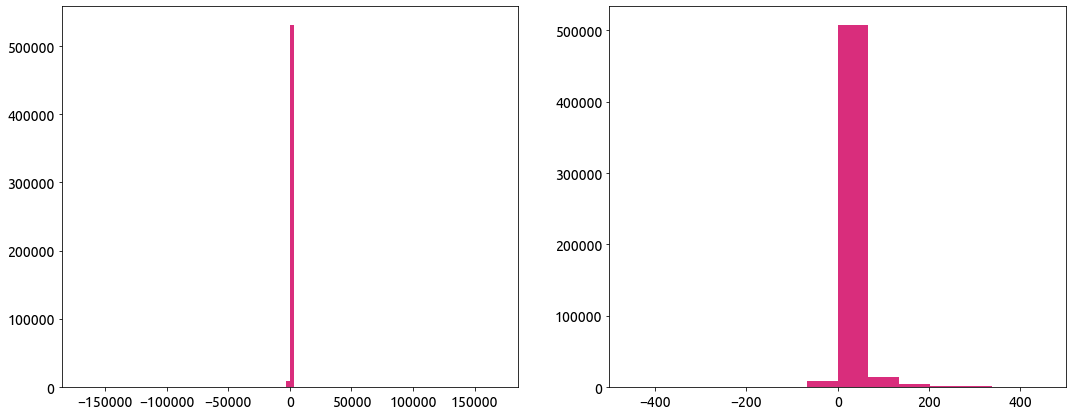

In [164]:
f, ax = plt.subplots(ncols=2, figsize=(18, 7))


ax[0].hist(df['Income'], bins=100, color='#d92d7c')
ax[1].hist(df['Income'], bins=5000, color='#d92d7c')

ax[1].set_xlim([-500, 500])

plt.show()


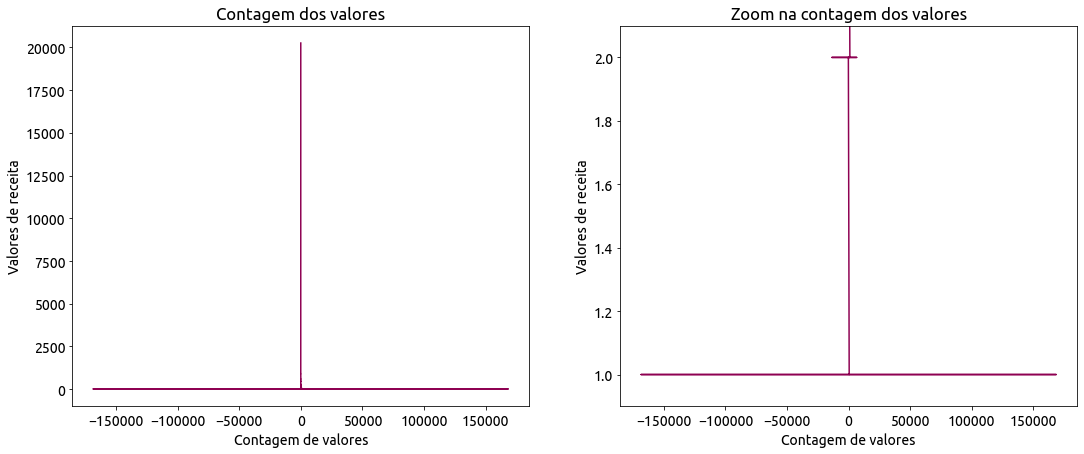

In [132]:
f, ax = plt.subplots(ncols=2, figsize=(18, 7))
df['Income'].value_counts().plot(ax=ax[0], cmap='PiYG')
df['Income'].value_counts().plot(ax=ax[1], cmap='PiYG')

for a in ax.flat:
    a.set(
        xlabel='Contagem de valores',
        ylabel='Valores de receita'
    )

ax[0].set(
    title='Contagem dos valores'
)

ax[1].set(ylim=[0.9, 2.1])


ax[1].set(
    title='Zoom na contagem dos valores'
)

plt.show()


In [133]:


# f, ax = plt.subplots(figsize=(9,7))

# df_y1['Income'].plot.bar(ax=ax, cmap='PiYG')

# ax.set_title('Volume médio de vendas de todas as lojas por mês')

# ax.grid()


# ax.bar(
#   inv_months['Income'],
#   inv_months['InvoiceMonth']
# )

# plt.show()

# display(df_y1)


# Existe alguma correlação entre o país e o volume de itens vendidos? Qual o item mais vendido e o menos vendido no país com maior volume de vendas?

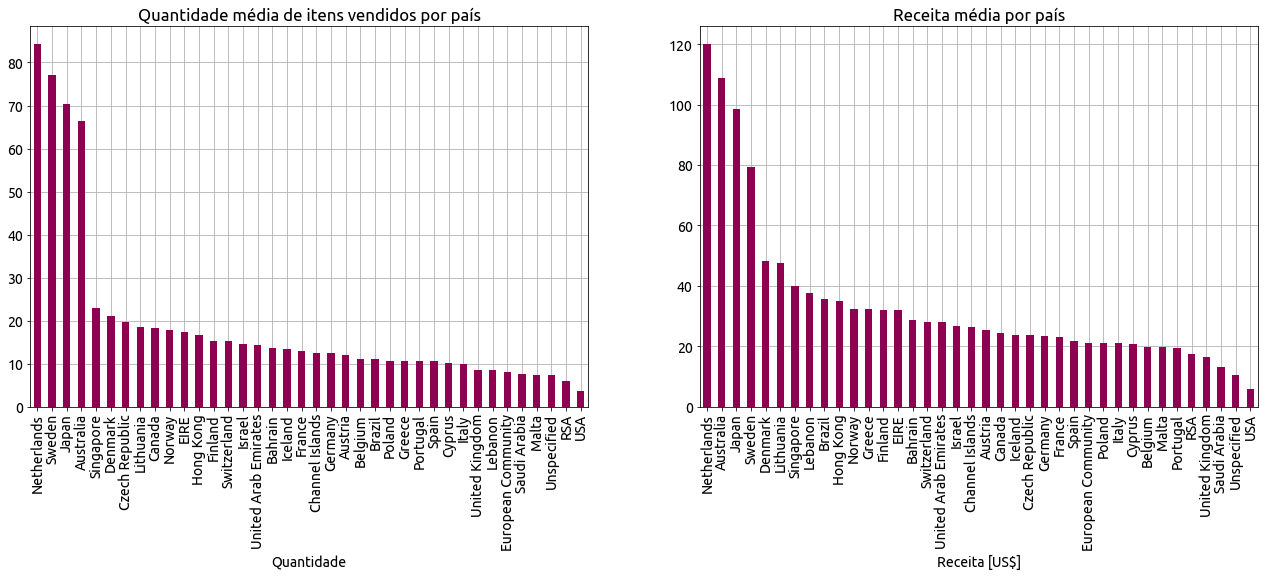

In [134]:
cols = ['Quantity', 'Income']

country_group = df.groupby('Country').mean()

f, ax = plt.subplots(ncols=2, figsize=(22, 7))
for i in range(len(cols)):
    country_group[cols[i]].sort_values(
        ascending=False).plot.bar(ax=ax[i], cmap='PiYG')
    ax[i].grid()

ax[0].set(
    title='Quantidade média de itens vendidos por país',
    xlabel='Quantidade'
)

ax[1].set(
    title='Receita média por país',
    xlabel='Receita [US$]'
)

plt.show()


<AxesSubplot:>

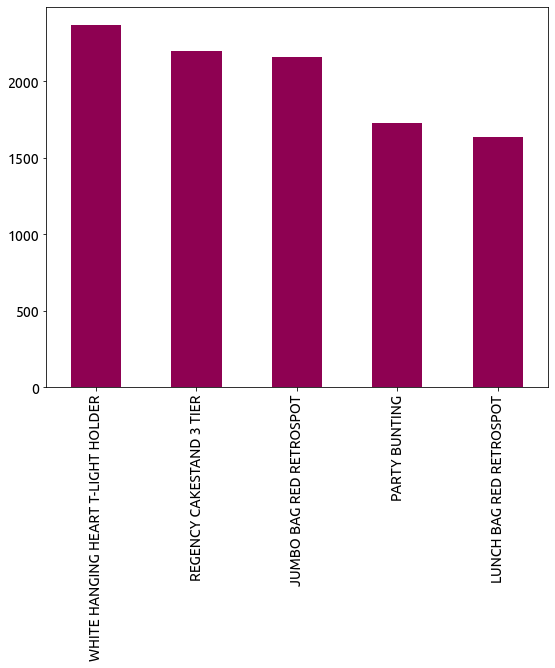

In [135]:
f, ax = plt.subplots(figsize=(9, 7))

df['Description'].value_counts().sort_values(ascending=False)[
    :5].plot.bar(ax=ax, cmap='PiYG')


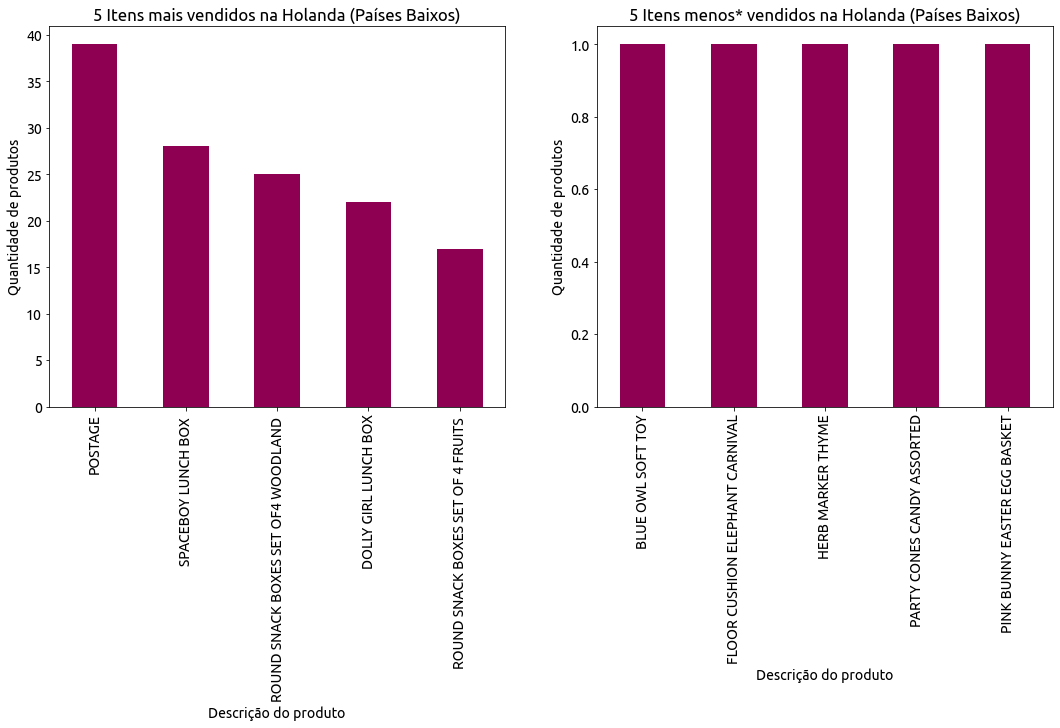

In [136]:
f, ax = plt.subplots(ncols=2, figsize=(18, 7))

nether_values = df[df['Country'] == 'Netherlands'].loc[:,
                                                       'Description'].value_counts().sort_values(ascending=False)

nether_values[:5].plot.bar(ax=ax[0], cmap='PiYG')
nether_values[-5:].plot.bar(ax=ax[1], cmap='PiYG')

ax[0].set_title('5 Itens mais vendidos na Holanda (Países Baixos)')
ax[1].set_title('5 Itens menos* vendidos na Holanda (Países Baixos)')

for a in ax.flat:
    a.set(
        xlabel='Descrição do produto',
        ylabel='Quantidade de produtos'
    )


plt.show()


Os itens menos vendidos na verdade são os itens que tenham menos de 2 registros no Dataset, assim é incorreto afirmar que os 5 registros mostrados são os menos vendidos.

O correto deveria ser exibir os itens que constam com menos de duas ocorrências:

In [137]:
less_sell_nether = nether_values[nether_values < 2]


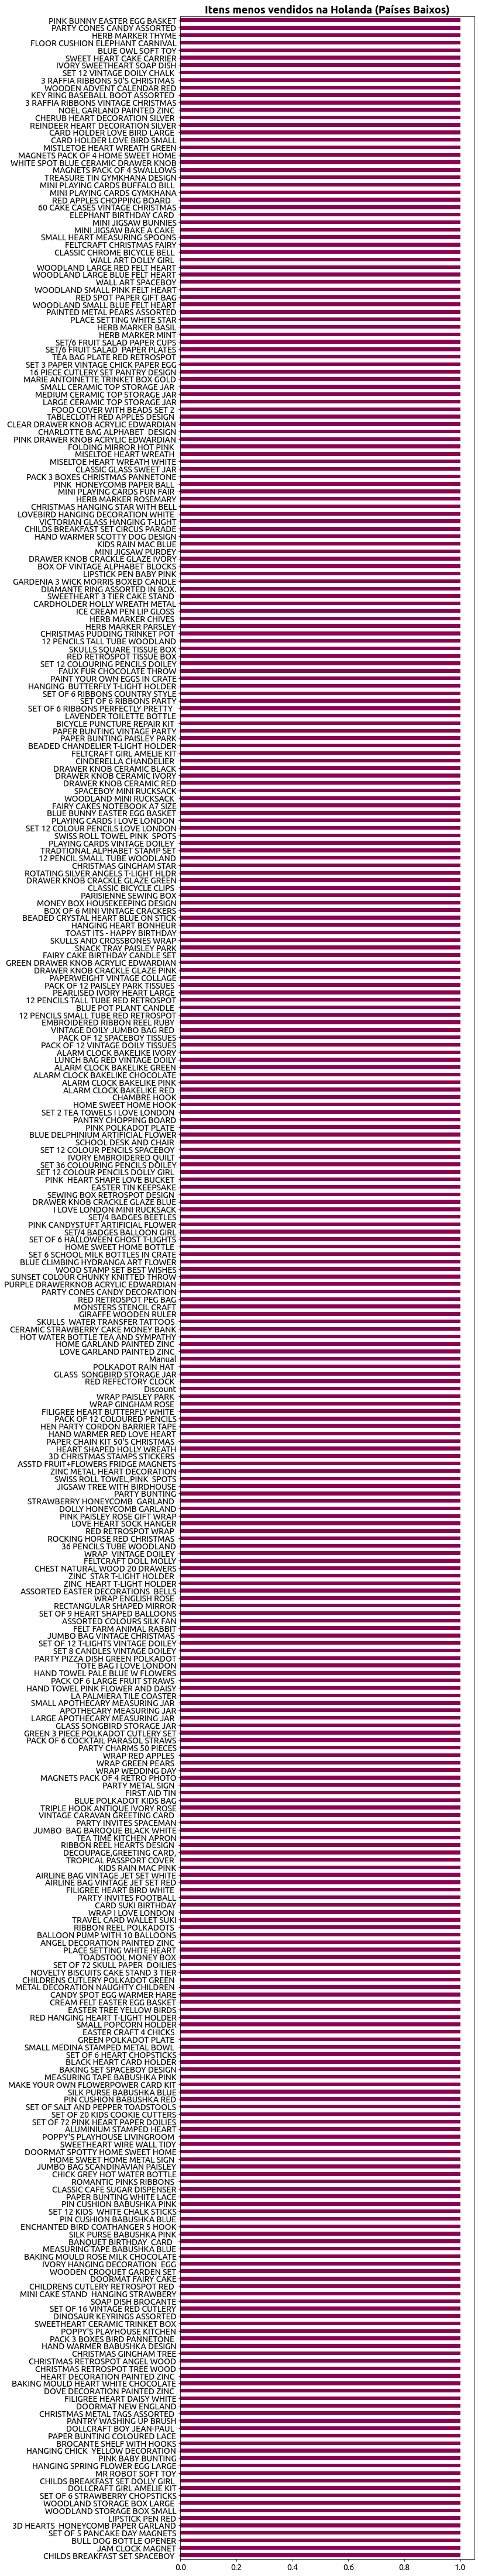

In [138]:
f, ax = plt.subplots(figsize=(9, 80))

less_sell_nether.plot.barh(ax=ax, cmap='PiYG')

ax.set_title('Itens menos vendidos na Holanda (Países Baixos)',
             fontsize=18, fontweight='bold')

# plt.savefig('./doc/fig/menos_vendidos.pdf')
plt.show()


# ideias/estratégias que podem ser implementadas para auxiliar nossos lojistas a aumentarem o volume de vendas